In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.special import lambertw
import matplotlib.ticker as ticker
import re

#def π(s) : return 1 - np.exp(-2*s)

def π(s):
    out = 1.0-np.exp(-2*s)
    out[out<0] = 0
    return out


def WM_model(fs, fd):
    fs = fs - 1   
    fd = fd - 1
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    Ps = mus*π(fs)
    Pd = mud*π(fd)
    Z = Pd.sum() + Ps.sum()
    return Pd.sum()/Z

def CI_model(fs,fd,MS):
    out = []
    fs = fs - 1   
    fd = fd - 1
    
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    ns = len(fs)
    nd = len(fd)
    for ms in MS:
        N = int(ms/U)
        Λs = N*np.log(N)/np.log(1+fs)
        Λd = N*np.log(N)/np.log(1+fd)
        
        for i in range(ns):
            Λs[i] *= (mus*np.sum(π(fs[fs>fs[i]])) + mud*np.sum(π(fd[fd>fs[i]])))
        for i in range(nd):
            Λd[i] *= (mus*np.sum(π(fs[fs>fd[i]])) + mud*np.sum(π(fd[fd>fd[i]])))
            
        Ps = π(fs)*np.exp(-Λs)*mus
        Pd = π(fd)*np.exp(-Λd)*mud
        
        Z = Ps.sum()+Pd.sum()      
        Pd /= Z
        out.append(Pd.sum())

    return out

In [6]:
# Load TEM1 data

folder = 'dataEmpirical/data_TEM1_4_10-3'   

ris = []
ris0 = []
fits = []
for s in sorted(glob.glob(folder+'/*ris.npy')):
    result = re.search(''+folder+'/(.*)_', s)
    seed = result.group(1)
    ris.append(np.load(folder+"/"+seed+"_ris.npy"))
    ris0.append(np.load(folder+"/"+seed+"_ris0.npy"))
    fits.append(np.load(folder+"/"+seed+"_fit.npy"))
x = np.load(glob.glob(folder+'/*MS.npy')[0])
ris = np.array(ris)
ris0 = np.array(ris0)
fits = np.array(fits)

α = 4*10**(-3)

fs = np.load("dataEmpirical/singles_TEM1.npy")
fd = np.load("dataEmpirical/doubles_TEM1.npy")
ns = len(fs)
nd = len(fd)
print("ns", ns)
print("nd", nd)
mus = 10**(-10)*3*0.76/5.80
mud = 10**(-10)*α*3*0.99*0.52/9.63

U = ns*mus + nd*mud
fractionAAlevel = mud*nd/(mud*nd+mus*ns)
fractionAAlevelBeneficial = mud*len(fd[fd>1])/(mud*len(fd[fd>1])+mus*len(fs[fs>1]))

Ubs = mus*len(fs[fs>1])

ΔW_SD = []
ΔW_S = []

for j in range(ris.shape[1]):
    R = ris[:,j,:]
    ΔW_SD.append((fits * R).sum(axis=1).mean() - 1)
    
    R = ris0[:,j,:]
    ΔW_S.append((fits[:,:ns+1] * R).sum(axis=1).mean() - 1)
    
ΔW_SD_TEM1 = np.array(ΔW_SD)
ΔW_S_TEM1 = np.array(ΔW_S)

xshift_TEM1=(len(fs[fs>1])*mus+len(fd[fd>1])*mud)/(len(fs)*mus+len(fd)*mud)


ns 1746
nd 3025


In [14]:
# Load P53 data

#α = 4*10**(-3)
#folder = 'dataEmpirical/data_P53_4_10-3'

α = 1*10**(-2)
folder = 'dataEmpirical/data_P53_10-2'


ris = []
ris0 = []
fits = []


for s in sorted(glob.glob(folder+'/*ris.npy')):
    result = re.search(''+folder+'/(.*)_', s)
    seed = result.group(1)
    ris.append(np.load(folder+"/"+seed+"_ris.npy"))
    ris0.append(np.load(folder+"/"+seed+"_ris0.npy"))
    fits.append(np.load(folder+"/"+seed+"_fit.npy"))
x = np.load(glob.glob(folder+'/*MS.npy')[0])
ris = np.array(ris)
ris0 = np.array(ris0)
fits = np.array(fits)




fs = np.load("dataEmpirical/singles_P53.npy")
fd = np.load("dataEmpirical/doubles_P53.npy")

ns = len(fs)
nd = len(fd)
print("ns", ns)
print("nd", nd)
mus = 10**(-10)*3*0.76/5.80
mud = 10**(-10)*α*3*0.99*0.52/9.63

U = ns*mus + nd*mud
Ubs = mus*len(fs[fs>1])

fractionAAlevel = mud*nd/(mud*nd+mus*ns)
fractionAAlevelBeneficial = mud*len(fd[fd>1])/(mud*len(fd[fd>1])+mus*len(fs[fs>1]))

ΔW_SD = []
ΔW_S = []

for j in range(ris.shape[1]):
    R = ris[:,j,:]
    ΔW_SD.append((fits * R).sum(axis=1).mean() - 1)
    
    R = ris0[:,j,:]
    ΔW_S.append((fits[:,:ns+1] * R).sum(axis=1).mean() - 1)
    
ΔW_SD_P53 = np.array(ΔW_SD)
ΔW_S_P53 = np.array(ΔW_S)

xshift_P53=(len(fs[fs>1])*mus+len(fd[fd>1])*mud)/(len(fs)*mus+len(fd)*mud)

print(ris.shape)

ns 2437
nd 3419
(1000, 40, 5857)


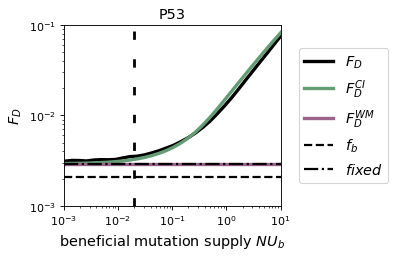

In [13]:
#Plot P53 results with alpha=4*10-3 

plt.figure(figsize=(3.5, 3), dpi=80)

plt.xscale("log")
plt.yscale("log")
plt.ylim(10**(-3), 10**(-1))
plt.xlim(10**(-3.), 10**(1))


plt.plot(xshift_P53 * x, ris[:, :, ns+1:].sum(axis=2).mean(axis=0), color="black", linewidth=3, label="$F_D$")
plt.plot(xshift_P53 * x, CI_model(fs, fd, x), linewidth=3, color="#639C75", label="$F_D^{CI}$")


plt.axhline([WM_model(fs, fd)], color="#9C638A", linewidth=3, label="$F_D^{WM}$")

epsilon=1
plt.axhline([fractionAAlevelBeneficial], linestyle="--", color="black", linewidth=2, label="$f_b$")
plt.axhline([0.0028779], linestyle="-.", color="black", linewidth=2, label="$fixed$")
plt.axvline([np.real(epsilon/(4*lambertw(epsilon/(4*Ubs))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)#, label="Clonal interference: \n $4U_b N\ln{N}=1$")
plt.axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


plt.ylabel(r"$F_{D}$", fontsize = 13)
plt.xlabel("beneficial mutation supply $NU_b$", fontsize=13)
plt.title("P53", fontsize=13)

# Move the legend outside of the plot
plt.legend(fontsize=13, bbox_to_anchor=(1.05, 0.5), loc='center left')

#plt.savefig("plotP53.pdf", bbox_inches="tight")
plt.show()


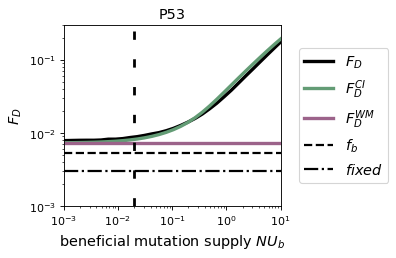

In [15]:
#Plot P53 results with alpha=10-2 

plt.figure(figsize=(3.5, 3), dpi=80)

plt.xscale("log")
plt.yscale("log")
plt.ylim(10**(-3), 3*10**(-1))
plt.xlim(10**(-3.), 10**(1))


plt.plot(xshift_P53 * x, ris[:, :, ns+1:].sum(axis=2).mean(axis=0), color="black", linewidth=3, label="$F_D$")
plt.plot(xshift_P53 * x, CI_model(fs, fd, x), linewidth=3, color="#639C75", label="$F_D^{CI}$")


plt.axhline([WM_model(fs, fd)], color="#9C638A", linewidth=3, label="$F_D^{WM}$")

epsilon=1
plt.axhline([fractionAAlevelBeneficial], linestyle="--", color="black", linewidth=2, label="$f_b$")
plt.axhline([0.0030298439630359036], linestyle="-.", color="black", linewidth=2, label="$fixed$")
plt.axvline([np.real(epsilon/(4*lambertw(epsilon/(4*Ubs))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)#, label="Clonal interference: \n $4U_b N\ln{N}=1$")
plt.axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


plt.ylabel(r"$F_{D}$", fontsize = 13)
plt.xlabel("beneficial mutation supply $NU_b$", fontsize=13)
plt.title("P53", fontsize=13)

# Move the legend outside of the plot
plt.legend(fontsize=13, bbox_to_anchor=(1.05, 0.5), loc='center left')

#plt.savefig("plotP53_001.pdf", bbox_inches="tight")
plt.show()


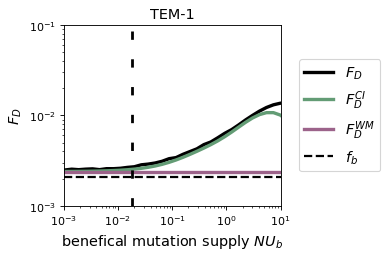

In [9]:
#Plot TEM1 results with alpha=4*10-3 

plt.figure(figsize=(3.5, 3), dpi=80)

plt.xscale("log")
plt.yscale("log")
plt.ylim(10**(-3),10**(-1))
plt.xlim(10**(-3.),10**(1))


plt.plot(xshift_TEM1*x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$F_D$")
plt.plot(xshift_TEM1*x,CI_model(fs,fd,x),linewidth = 3, color = "#639C75", label="$F_D^{CI}$")
plt.axhline([WM_model(fs,fd)],color="#9C638A",linewidth=3, label="$F_D^{WM}$")


epsilon=1
plt.axhline([fractionAAlevelBeneficial], linestyle="--", color="black",linewidth=2, label="$f_b$")
plt.axvline([np.real(epsilon/(4*lambertw(epsilon/(4*Ubs))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
plt.axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

plt.xlabel("benefical mutation supply $NU_b$", fontsize = 13)
plt.ylabel(r"$F_{D}$", fontsize = 13)
plt.title("TEM-1", fontsize = 13)


# Move the legend outside of the plot
plt.legend(fontsize=13, bbox_to_anchor=(1.05, 0.5), loc='center left')


#plt.savefig("plotTEM1.pdf", bbox_inches = "tight")